# Comparing the output of the results from tf and torch

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import argparse

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tml.data.load_data import load_and_preprocess_data
from tml.plotting.plotting import tml_plots
from tml.utils.utils import load_config

In [4]:
config = load_config("../tml/configs/config.yaml")

result = pd.read_csv(f"../{config['out_path']}/{config['sample_name']}_scores.csv")
result_tf = pd.read_csv("../../../Moved_Data/Ehsan_Karimiara/DigiPico/results/DigiPico_scores.csv")
header = ['Mutation', 'Type', 'Probability_Score', 'Uncertainty_Score', 'Result']

In [24]:
result['tf_Probability_Score'] = result_tf['Probability_Score']
result['tf_Uncertainty_Score'] = result_tf['Uncertainty_Score']
result['tf_Result'] = result_tf['Result']
df = result.copy()
df['torch_Result'] = result['Result']

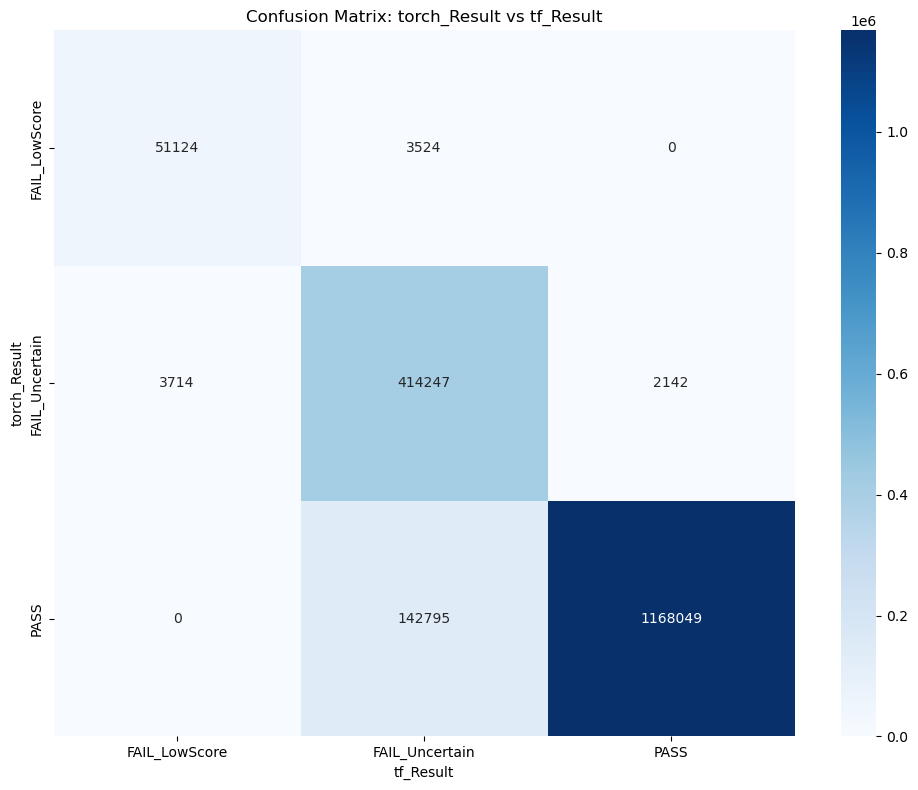

In [25]:
# Create the confusion matrix
cm = confusion_matrix(df['torch_Result'], df['tf_Result'])

# # Get unique labels (sorted to ensure consistent order)
# labels = sorted(set(df['torch_Result'].unique()) | set(df['tf_Result'].unique()))

# Create a DataFrame for better labeling
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix: torch_Result vs tf_Result')
plt.ylabel('torch_Result')
plt.xlabel('tf_Result')

plt.tight_layout()
plt.show()

In [14]:
cols = range(1, config['num_cols']+1)
config['input_dim'] = len(cols) - 1

# Load data and normalize
load_dict =load_and_preprocess_data(f"../{config['input_path']}", cols)

Start Loading Data!
Loading Data Done!
Start Preparing Data!
Data Preparation Done!


In [17]:
from tml.plotting.plotting import tml_plots

final = np.column_stack((result['Probability_Score'].values, result['Uncertainty_Score'].values))
final_tf = np.column_stack((result_tf['Probability_Score'].values, result_tf['Uncertainty_Score'].values))

thr = tml_plots(final,
                load_dict['neg_ind'],
                load_dict['hpos_ind'],
                config['pscore_cf'],
                config['auc_cf'],
                config['tpr_cf'],
                "torch"
                )

thr_tf = tml_plots(final_tf,
                   load_dict['neg_ind'],
                   load_dict['hpos_ind'],
                   config['pscore_cf'],
                   config['auc_cf'],
                   config['tpr_cf'],
                   "tf"
                  )


In [ ]:
final = np.column_stack((final, np.repeat("PASS", len(y_pred_mvar))))
final[final[:,1].astype(float) > thr, 2] = "FAIL_Uncertain"
final[final[:,0].astype(float) <= config['pscore_cf'], 2] = "FAIL_LowScore"
save = np.column_stack((load_dict['names'], final))


In [10]:
cols = range(1, config['num_cols']+1)
config['input_dim'] = len(cols) - 1

# Load data and normalize
load_dict =load_and_preprocess_data(f"../{config['input_path']}", cols)

Start Loading Data!
Loading Data Done!
Start Preparing Data!
Data Preparation Done!


In [16]:
np.unique(load_dict['all_set'][:, 0], return_counts=True)

(array([0., 1.]), array([   1634, 1783961]))

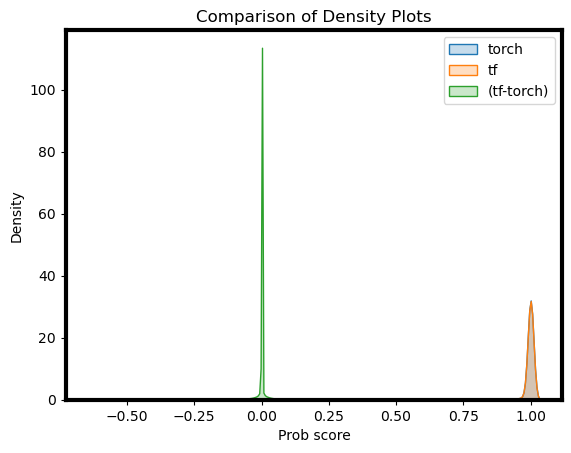

In [26]:
sns.kdeplot(data=result['Probability_Score'], fill=True, label="torch")
sns.kdeplot(data=result_tf['Probability_Score'], fill=True, label="tf")

sns.kdeplot(data=result_tf['Probability_Score']-result['Probability_Score'], fill=True, label="(tf-torch)")

plt.legend()
plt.title("Comparison of Density Plots")
plt.xlabel("Prob score")
plt.ylabel("Density")
plt.show()

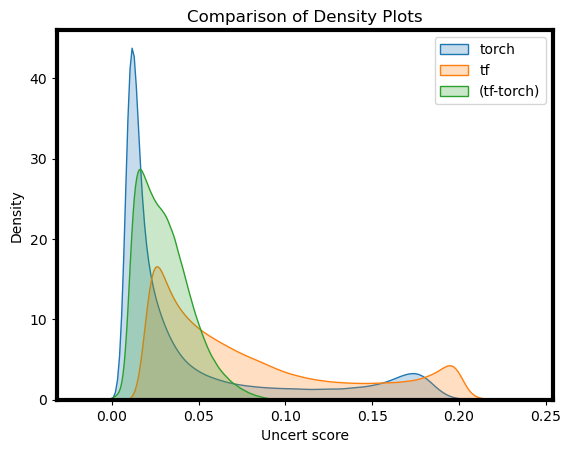

In [27]:
sns.kdeplot(data=result['Uncertainty_Score'], fill=True, label="torch")
sns.kdeplot(data=result_tf['Uncertainty_Score'], fill=True, label="tf")

sns.kdeplot(data=result_tf['Uncertainty_Score']-result['Uncertainty_Score'], fill=True, label="(tf-torch)")

plt.legend()
plt.title("Comparison of Density Plots")
plt.xlabel("Uncert score")
plt.ylabel("Density")
plt.show()